A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:   

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
ds_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = ds_mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

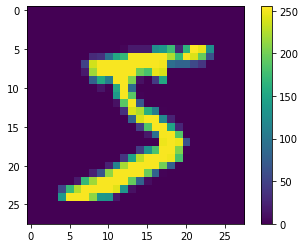

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

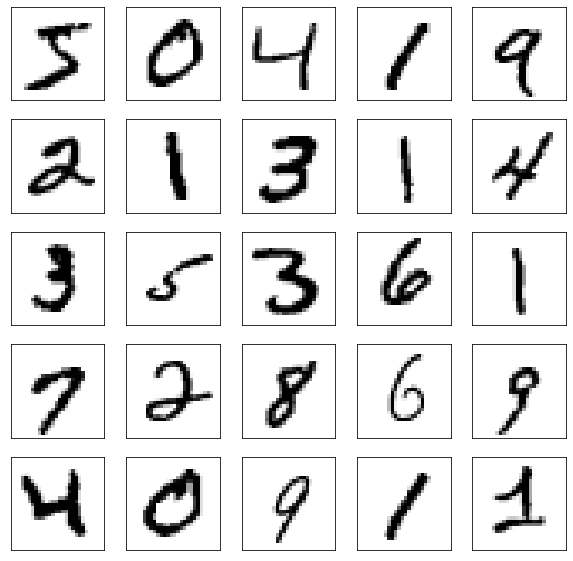

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
train_images_gr = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_gr = test_images.reshape(test_images.shape[0], 28, 28, 1)

print("train_images_gr shape:", train_images_gr.shape)
print("test_images_gr shape:", test_images_gr.shape)

train_images_gr shape: (60000, 28, 28, 1)
test_images_gr shape: (10000, 28, 28, 1)


### MODELO 1

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [10]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (28,28,1)

model = keras.models.Sequential()


# First conv-pool layers - set 1
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))

# Flatten layer
# transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles)
model.add(keras.layers.Flatten())

# Dense layer with dropout
model.add(keras.layers.Dense(units=32, activation="relu"))

# Output layer
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                43296     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
____________________________________________________

In [11]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images_gr, train_labels, epochs=10)

c:\users\clara\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.2931 - accuracy: 0.9119
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1336 - accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1031 - accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0828 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0703 - accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0617 - accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0573 - accuracy: 0.9815
Epoch 8/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0514 - accuracy: 0.9839
Epoch 9/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0461 - accuracy: 0.9857
Epoch 10/10
1875/1875 [==============================] - 63s 34

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 5s - loss: 0.0428 - accuracy: 0.9857

Test accuracy: 0.9857000112533569


### PREDICCIONES

In [14]:
predictions = model.predict(test_images)

In [15]:
def plot_image(i, predictions_array, true_label, img):
        predictions_array, true_label, img = predictions_array, true_label[i], img[i]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

        plt.imshow(img, cmap=plt.cm.binary)

        predicted_label = np.argmax(predictions_array)
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'

        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

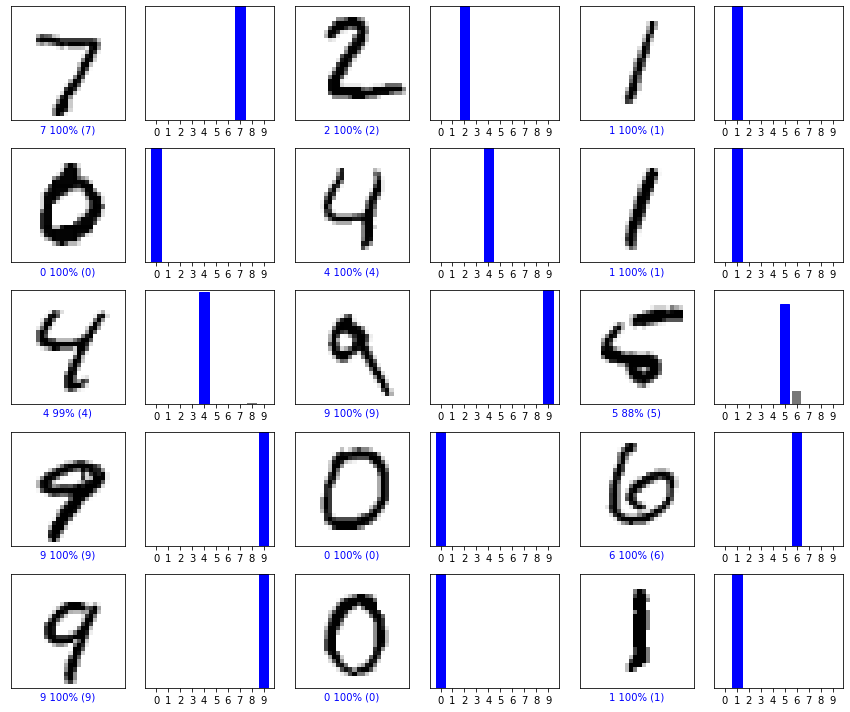

In [16]:
# Imagen de test (real vs prediccion). Aciertos (azul) y Fallos (Rojo)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### MODELO 2

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)


In [17]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (28,28,1)

model2 = keras.models.Sequential()


# First conv-pool layers - set 1
model2.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model2.add(keras.layers.Dropout(rate=0.25))

# Flatten layer
# transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles)
model2.add(keras.layers.Flatten())

# Dense layers
model2.add(keras.layers.Dense(units=16, activation="relu"))
model2.add(keras.layers.Dense(units=32, activation="relu"))
# Output layer
model2.add(keras.layers.Dense(units=10, activation="softmax"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                21648     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [18]:
# Compilar el modelo
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model2.fit(train_images_gr, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3568 - accuracy: 0.8902
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1550 - accuracy: 0.9523
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1224 - accuracy: 0.9625
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1061 - accuracy: 0.9665
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0916 - accuracy: 0.9719
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0826 - accuracy: 0.9739
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0708 - accuracy: 0.97791s - loss: - ETA: 0s - loss: 0.0
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0674 - accuracy: 0.9789
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0612 - accuracy: 0.97996s - loss: 0.0604 
Epoch 10/10
18

In [20]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0479 - accuracy: 0.9837

Test accuracy: 0.9836999773979187
